In [1]:
from PyPDF2 import PdfReader
import os
import re
import glob
import pandas as pd

In [10]:
n_pages =27

In [21]:
pdf_path = 'C:/Users/HP SUPPORT/Dropbox/scrap_ocr/WEO/WEO_OCT2023.pdf'
reader   = PdfReader( pdf_path )
n_pages  = len( reader.pages )

try:
    extracted_text = [ reader.pages[ i ].extract_text() for i in range( n_pages ) ]
    print( 'Text successfully extracted' )

except:
    extracted_text = []   
    print( 'Text not found' )

FileNotFoundError: [Errno 2] No such file or directory: 'C:/Users/HP SUPPORT/Dropbox/scrap_ocr/WEO/WEO_OCT2023.pdf'

In [12]:
print( f'Number of pages: { n_pages }' )

Number of pages: 27


In [13]:
extracted_text[ 27 ]

NameError: name 'extracted_text' is not defined

In [14]:
start_pattern = r'Table 1\.'
end_pattern   = r'Source'

start_match   = re.search( start_pattern, combined_text, re.IGNORECASE )
end_match     = re.search( end_pattern, combined_text[ start_match.end(): ], re.IGNORECASE )

end_index     = start_match.end() + end_match.start()
article_text  = combined_text[ start_match.end(): end_index ].strip()

article_text

NameError: name 'combined_text' is not defined

In [15]:
import camelot

In [16]:
reader = camelot.read_pdf( 
            '../data/WEO/WEO_OCT2023.pdf', 
                          pages = '27', flavor = 'lattice' )


reader

<TableList n=0>

In [8]:
table = reader[ 5 ].df
table #.head( 5 )

IndexError: list index out of range

In [22]:
reader = camelot.read_pdf( '../data/WEO/WEO_OCT2023.pdf', pages = '27', flavor = 'stream' )
len( reader )

1

C:\Users\HP SUPPORT\AppData\Local\Temp\ipykernel_2192\3203909404.py:1: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  camelot.plot( reader[ 0 ], kind = 'text' ).show()


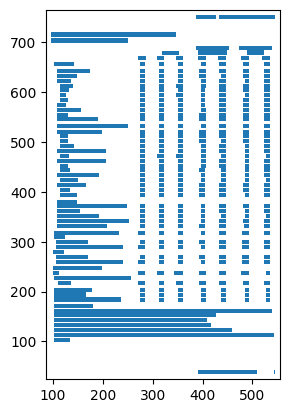

In [23]:
camelot.plot( reader[ 0 ], kind = 'text' ).show()

In [24]:
table = reader[ 0 ].df
table       #.head( 15 )

,0,1,2,3,4,5,6,7
0,"(Percent change, unless noted otherwise)",,,,,,,
1,,,,,,Difference from July,,Difference from April
2,,,,Projections,,2022 WEO Update1,,2022 WEO1
3,,2021,2022,2023,2022,2023,2022,2023
4,World Output,6.0,3.2,2.7,0.0,–0.2,–0.4,–0.9
5,Advanced Economies,5.2,2.4,1.1,–0.1,–0.3,–0.9,–1.3
6,United States,5.7,1.6,1.0,–0.7,0.0,–2.1,–1.3
7,Euro Area,5.2,3.1,0.5,0.5,–0.7,0.3,–1.8
8,Germany,2.6,1.5,–0.3,0.3,–1.1,–0.6,–3.0
9,France,6.8,2.5,0.7,0.2,–0.3,–0.4,–0.7


In [35]:
table = table.drop(51)

In [32]:
from datetime import date, timedelta
date = date(2023,10,10)
data_date = [date.strftime("%m/%Y")]
data_date

['10/2023']

In [36]:
path_static = '../data/OCR/WEO_project'
os.makedirs( path_static, exist_ok = True )

path_table = path_static + '/WEO_project_'+date.strftime("%m.%Y")+'.xlsx'
table.to_excel( path_table, index = False )